In [5]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("customer_data.csv")
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [7]:
# Initial Data Check

df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [9]:
# Feature Engineering ( Age Group )
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 25, 35, 45, 60, 100],
    labels=['18-25', '26-35', '36-45', '46-60', '60+']
)

In [13]:
# Promotion Usage Flag
df['promo_flag'] = np.where(
    df['promotion_usage'] == 'Yes', 1, 0
)

In [14]:
# Customer DNA Scoring ( A. Value score )
df ['value_score'] = np.select(
    [
        df['purchase_amount'] >= df['purchase_amount'].quantile(0.75),
        df['purchase_amount'] >= df['purchase_amount'].quantile(0.40)
    ],
    [3, 2],
    default=1
)

In [15]:
# B. Loyalty Score
df['loyalty_score'] = np.where(
    df['loyalty_status'] == 'Gold', 3,
    np.where(df['loyalty_status'] == 'Silver', 2, 1)
)

In [17]:
# C. Experience Score
df['experience_score'] = np.where(
    df['satisfaction_score'] >= 4, 3,
    np.where(df['satisfaction_score'] >= 3, 2, 1)
)


In [19]:
# Final Customer DNA Score
df['customer_dna_score'] = (
    df['value_score'] +
    df['loyalty_score'] +
    df['experience_score']
)

In [22]:
# Customer DNA Segmentation
df['dna_segment'] = pd.cut(
    df['customer_dna_score'],
    bins=[0, 4, 7, 10],
    labels=['Low Value', 'Medium Value', 'High Value']
)


In [29]:
df.groupby('dna_segment')[['purchase_amount', 'satisfaction_score']].mean()


C:\Users\Pratham\AppData\Local\Temp\ipykernel_63044\2370009683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('dna_segment')[['purchase_amount', 'satisfaction_score']].mean()


,purchase_amount,satisfaction_score
dna_segment,,
Low Value,5146.018984,2.817979
Medium Value,8974.796007,5.037849
High Value,14682.341872,5.128398


In [30]:
# Visual Validation

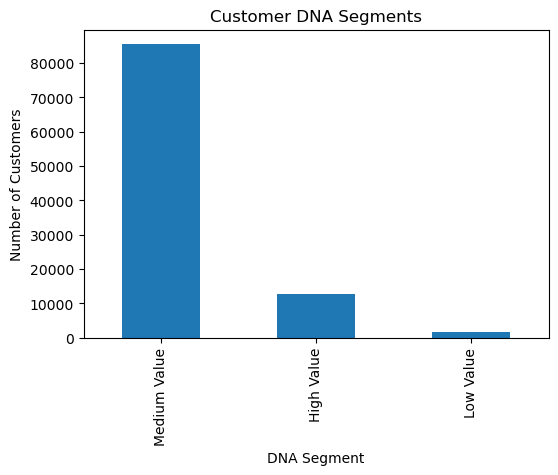

In [31]:
# A. DNA Segment Distribution
plt.figure(figsize=(6,4))
df['dna_segment'].value_counts().plot(kind='bar')
plt.title("Customer DNA Segments")
plt.xlabel("DNA Segment")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\Pratham\AppData\Local\Temp\ipykernel_63044\1238145167.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['purchase_amount'].mean().plot(kind='bar')


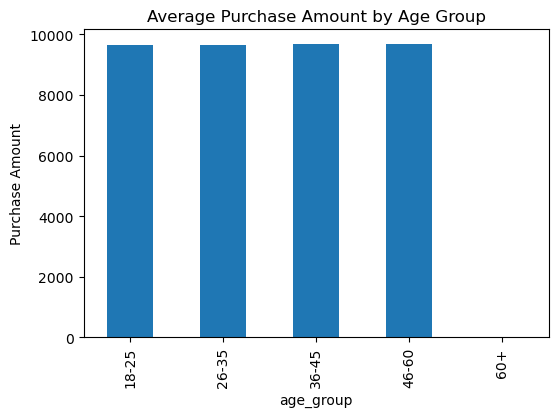

In [32]:
# B. Purchase Amount by Age Group

plt.figure(figsize=(6,4))
df.groupby('age_group')['purchase_amount'].mean().plot(kind='bar')
plt.title("Average Purchase Amount by Age Group")
plt.ylabel("Purchase Amount")
plt.show()